## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
mice=merged_df["Mouse ID"].unique()
mice_number=len(mice)
mice_number

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice=merged_df["Mouse ID"].value_counts()

mice

g989    13
o287    10
a262    10
i557    10
k483    10
        ..
x336     1
x226     1
l872     1
u153     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse=merged_df.loc[merged_df["Mouse ID"]=="g989", :]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merged_df[merged_df["Mouse ID"] != "g989"]

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
mice=clean_data["Mouse ID"].unique()
mice_count=len(mice)
mice_count

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol=clean_data.groupby(["Drug Regimen"])
mean_vol=tumor_vol["Tumor Volume (mm3)"].mean()


# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [20]:
median_vol=tumor_vol["Tumor Volume (mm3)"].median()


In [21]:
var_vol=tumor_vol["Tumor Volume (mm3)"].var()


In [22]:
sd_vol=tumor_vol["Tumor Volume (mm3)"].std()


In [23]:
sem_vol=tumor_vol["Tumor Volume (mm3)"].sem()


In [24]:
tumor_vol_table=pd.DataFrame({
                            "Mean Tumor Volume": mean_vol,
                            "Median Tumor Volume": median_vol,
                            "Variance Tumor Volume": var_vol,
                            "Standard Deviation Volume": sd_vol,
                            "Standard Error of Measurement": sem_vol})


tumor_vol_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Volume,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice=clean_data.groupby(["Drug Regimen"])
total_mice=mice["Mouse ID"].count()
total_mice_final=total_mice/10

total_mice_summary=pd.DataFrame({"Mouse Count": total_mice_final,
                                })
total_mice_summary=total_mice_summary[["Mouse Count"]]
total_mice_summary



,Mouse Count
Drug Regimen,
Capomulin,23.0
Ceftamin,17.8
Infubinol,17.8
Ketapril,18.8
Naftisol,18.6
Placebo,18.1
Propriva,14.8
Ramicane,22.8
Stelasyn,18.1


In [51]:
mice=clean_data.groupby(["Drug Regimen","Timepoint"])
total_mice=mice["Mouse ID"].count()
total_mice_final=total_mice

total_mice_summary=pd.DataFrame({"Mouse Count": total_mice_final,
                                })
total_mice_summary=total_mice_summary[["Mouse Count"]]
total_mice_summary

Mouse Count
Drug Regimen Timepoint             
Capomulin    0                   25
             5                   25
             10                  25
             15                  24
             20                  23
...                             ...
Zoniferol    25                  16
             30                  15
             35                  14
             40                  14
             45                  14

[100 rows x 1 columns]

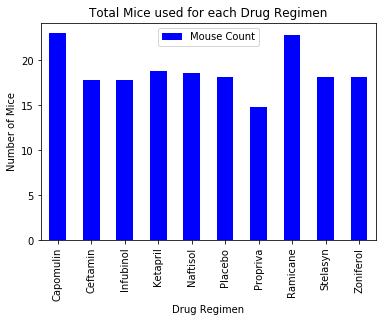

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
total_mice_summary.plot(kind="bar", facecolor="blue")
plt.title("Total Mice used for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

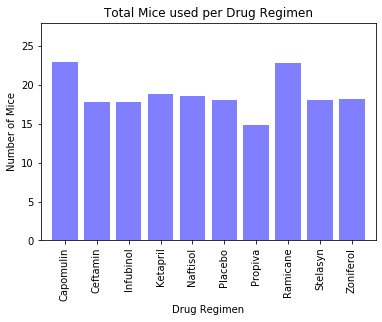

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(mice))
mice=[23, 17.8, 17.8, 18.8, 18.6, 18.1, 14.8, 22.8, 18.1, 18.2]
plt.bar(x_axis, mice, color='b', alpha=.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                            "Placebo", "Propiva", "Ramicane", "Stelasyn", "Zoniferol"], 
                                rotation='vertical')
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+5)
plt.title("Total Mice used per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [ ]:
mice_sex=clean_data["Sex"].value_counts()
mice_sex

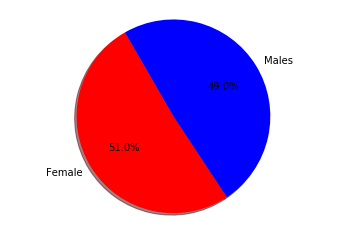

In [52]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Males"]

sizes=[958, 922]

colors=["red", "blue"]

explode=(0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=120)

plt.axis("equal")

plt.show()




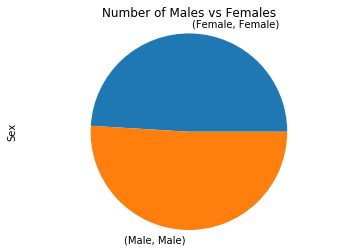

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex=clean_data.groupby('Sex')
mice_sex_count=mice_sex["Sex"].value_counts()
mice_sex_count.plot(kind="pie", y=mice_sex_count, title="Number of Males vs Females")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin") | 
                          (clean_data["Drug Regimen"]=="Ramicane")  |
                          (clean_data["Drug Regimen"]=="Infubinol") |
                          (clean_data["Drug Regimen"]=="Ceftamin"), :]

                          
four_drugs_final=four_drugs.loc[(four_drugs["Timepoint"]==45), :]
four_drugs_final.head(20)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
